# **K-Nearest Neighbors Classifier & Saving Model**

K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified.

K-Nearest Neighbors is one of the most basic algorithm used for Classification.

KNN is a non ``parametric algorithm`` (meaning, it does not make any underlying assumptions about the distribution of data) belonging to supervised learning community. KNN algorithm can also be used for regression problems.The only difference will be using averages of nearest neighbors rather than voting from nearest neighbors.

### **Intuition behind the algorithm**

In K-NN algorithm output is a class membership. An object is assigned a class which is most common among its K nearest neighbors, K being the number of neighbors. Intuitively K is always a positive integer. Thus if K = 1.The object is assigned a class of its nearest neighbor.

<img src = 'a_img.png' width="500" height="400">

### **How does KNN work?**

We have age and experience in an organization along with the salaries. We want to predict the salary of a new candidate whose age and experience is available.

**Step 1:** Choose a value for K. K should be an odd number.

**Step2:** Find the distance of the new point to each of the training data.

**Step 3:** Find the K nearest neighbors to the new data point.

**Step 4:** For classification, count the number of data points in each category among the k neighbors. New data point will belong to class that has the most neighbors.

For regression, value for the new data point will be the average of the k neighbors.

<img src= 'b_img.png' width="700" height="500">

### **How do we Decide Value of K?**

Following are the different boundaries separting the two classes

<img src = 'c_img.png'> <img src = 'e_img.png'>

If you observe the graph,with increasing value of ‘K’ boundaries become more smoother. With ‘K’ increasing to infinity it finally becomes all blue or all red depending on the total majority.

Lets examine training and validation error rate with varying values of K.

<img src = 'd_img.png'> <img src = 'f_img.png'>

If we observe the training error rate graph it can be seen that error increases for increasing value of K,also error is zero for K=1.This is because the closest point to any training data point is itself.Hence the prediction is always accurate with K=1.

If validation error curve would have been similar, our choice of K would have been 1.

By observing validation error rate we can interpret that At K=1, we were over fitting the boundaries. In Validation graph Error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. This value of K where error reaches minima should be used for all predictions.

## **Which value is the nearest value i.e which distance metrics can be used?**

### **1. Euclidean Distance**

The Euclidean distance or Euclidean metric is the “ordinary” straight-line distance between two points in Euclidean space.(Wikipedia)

<img src = 'g_img.png' width="500" height="400">

<img src='k_img.png'>

### **2. Manhattan Distance**

The Manhattan distance between two vectors (or points) a and b is defined as ∑i|ai−bi| over the dimensions of the vectors. It is called the Manhattan distance because all paths from the bottom left to top right of this idealized city have the same distance.

<img src = 'h_img.png' width="300" height="300"> <img src = 'i_img.png'>
<img src='l_img.png'>

### **3. Chebyshev Distance**

In mathematics, Chebyshev distance (or Tchebychev distance), maximum metric, or L∞ metric is a metric defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension. It is named after Pafnuty Chebyshev.(Wikipedia)

<img src='j_img.png'>

### **Applications of KNN:**

-    If you’re searching for semantically similar documents (i.e., documents containing similar topics), this is referred to as Concept Search.
-    The biggest use case of K-NN search might be Recommender Systems. If you know a user likes a particular item, then you can recommend similar items for them.

### **Advantages:**

-    No assumptions about data — useful, for example, for nonlinear data
-    Simple algorithm — to explain and understand/interpret
-    High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
-    Versatile — useful for classification or regression

### **Disadvantages:**

-    Computationally expensive — because the algorithm stores all of the training data
-    High memory requirement
-    Prediction stage might be slow (with big N)
-    Sensitive to irrelevant features and the scale of the data.

<hr>

## **Irish Dataset**
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

<img src = 'm_img.png'>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, f1_score

In [52]:
# buka iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [53]:
# nama target
(iris['target_names'])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
df = pd.DataFrame(iris['data'], columns = ['SL', 'SW', 'PL', 'PW'])
df['target'] = iris['target']
df.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualize Datasets

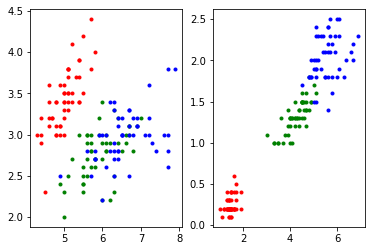

In [57]:
plt.subplot(121)
plt.plot(df['SL'][df['target']==0], df['SW'][df['target']==0], 'r.') #setosa
plt.plot(df['SL'][df['target']==1], df['SW'][df['target']==1], 'g.') #versicolor
plt.plot(df['SL'][df['target']==2], df['SW'][df['target']==2], 'b.') #virginica
plt.subplot(122)
plt.plot(df['PL'][df['target']==0], df['PW'][df['target']==0], 'r.') #setosa
plt.plot(df['PL'][df['target']==1], df['PW'][df['target']==1], 'g.') #versicolor
plt.plot(df['PL'][df['target']==2], df['PW'][df['target']==2], 'b.') #virginica
plt.show()

### __Splitting Dataset__

In [58]:
x = df[['SL', 'SW', 'PL', 'PW']]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

### __Fitting KNN Model__

In [59]:
# belum mengatur jumlah k (tetangga), default n_neighbors = 5
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### __Predict__

In [60]:
y_pred = model.predict(x_test)

In [61]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

### __Evaluating Model__

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [63]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100,
                     recall_score(y_test, y_pred, average = 'macro')*100,
                     precision_score(y_test, y_pred, average = 'macro')*100,
                     roc_auc_score(y_test, model.predict_proba(x_test), labels=[0,1,2], multi_class='ovo', average='macro')*100,
                     f1_score(y_test, y_pred, average='macro')*100
                    ],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,96.666667
recall,97.435897
precision,95.238095
roc_auc_score,100.000000
f1_score,96.102564


In [64]:
pd.DataFrame(data = [model.score(x_train, y_train)*100,
                    model.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)'])

,Score (%)
Model Score in Data Train,95.000000
Model Score in Data Test,96.666667


<hr>

## __Deciding K Value__
Berapa nilai K (jumlah tetangga) yang digunakan untuk memprediksi suatu data?

1. sqrt(n) : akar pangkat 2 dari total data training
2. pilih nilai yang ganjil

In [65]:
# misalnya hasilnya genap, perlu ditambah + 1
k = round(len(x_train) ** 0.5)
k

11

In [67]:
model_k = KNeighborsClassifier(n_neighbors = k) # n_neighbors mengikuti hasil penghitungan k
model_k.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [68]:
y_pred_k = model_k.predict(x_test)

### __Evaluating Model__

In [62]:
print(classification_report(y_test, y_pred_k))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [69]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_k)*100,
                     recall_score(y_test, y_pred_k, average = 'macro')*100,
                     precision_score(y_test, y_pred_k, average = 'macro')*100,
                     roc_auc_score(y_test, model_k.predict_proba(x_test), labels=[0,1,2], multi_class='ovo', average='macro')*100,
                     f1_score(y_test, y_pred_k, average='macro')*100
                    ],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,100.0
recall,100.0
precision,100.0
roc_auc_score,100.0
f1_score,100.0


In [70]:
pd.DataFrame(data = [model_k.score(x_train, y_train)*100,
                    model_k.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)'])

,Score (%)
Model Score in Data Train,95.833333
Model Score in Data Test,100.000000


<hr>

# **``Saving Model``**

### **1. Saving Model using Joblib**

In [74]:
# simulasi file untuk menyimpan model
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import joblib

dataIris = load_iris()
df = pd.DataFrame(dataIris['data'], columns=['SL', 'SW', 'PL', 'PW'])
df['target'] = dataIris['target']
df['spesies'] = df['target'].apply(lambda x: dataIris['target_names'][x])

xtr, xts, ytr, yts = train_test_split(
    df[['SL', 'SW', 'PL', 'PW']],
    df['spesies'],
    test_size = .2)

model_LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model_LR.fit(xtr, ytr)

joblib.dump(model_LR, 'model_LR_Joblib')

['model_LR_Joblib']

### **2. Using Joblib Model**

In [76]:
# simulasi menggunakan model

model_joblib = joblib.load('model_LR_Joblib')

# user input data
SL = int(input('Ketik berapa Sepal Length: '))
SW = int(input('Ketik berapa Sepal Width: '))
PL = int(input('Ketik berapa Petal Length: '))
PW = int(input('Ketik berapa Petal Width: '))

print('Hasil Prediksi: ', model_joblib.predict([[SL, SW, PL, PW]])[0])
print('Probabilitas Prediksi: ', round(model_joblib.predict_proba([[SL, SW, PL, PW]]).tolist()[0][0]*100, 2))

Ketik berapa Sepal Length:  2
Ketik berapa Sepal Width:  3
Ketik berapa Petal Length:  1
Ketik berapa Petal Width:  4


Hasil Prediksi:  setosa
Probabilitas Prediksi:  99.88


### **2. Saving Model using Pickle**

In [77]:
# simulasi file untuk menyimpan model
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle

dataIris = load_iris()
df = pd.DataFrame(dataIris['data'], columns=['SL', 'SW', 'PL', 'PW'])
df['target'] = dataIris['target']
df['spesies'] = df['target'].apply(lambda x: dataIris['target_names'][x])

xtr, xts, ytr, yts = train_test_split(
    df[['SL', 'SW', 'PL', 'PW']],
    df['spesies'],
    test_size = .2)

model_LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model_LR.fit(xtr, ytr)

with open('model_LR_pickle', 'wb') as modelku:
    pickle.dump(model_LR, modelku)

In [79]:
# simulasi menggunakan model
import pickle
with open('model_LR_pickle', 'rb') as modelku:
    model_pickle = pickle.load(modelku)

# user input data
SL = int(input('Ketik berapa Sepal Length: '))
SW = int(input('Ketik berapa Sepal Width: '))
PL = int(input('Ketik berapa Petal Length: '))
PW = int(input('Ketik berapa Petal Width: '))

print('Hasil Prediksi: ', model_pickle.predict([[SL, SW, PL, PW]])[0])
print('Probabilitas Prediksi: ', round(model_pickle.predict_proba([[SL, SW, PL, PW]]).tolist()[0][0]*100, 2))

Ketik berapa Sepal Length:  5
Ketik berapa Sepal Width:  4
Ketik berapa Petal Length:  3
Ketik berapa Petal Width:  2


Hasil Prediksi:  setosa
Probabilitas Prediksi:  68.3


<hr>

## **Take Home/Class Exercise**

#### 1. Dataset yang dipakai adalah **Heart Disease Dataset** ('heart.csv'). 
#### 2. Keterangan target: 1 = sakit (positif), 0 = sehat (negatif)
#### 3. Jalankan Hyperparameter Tuning untuk Model ``Random Forest Classification``!
#### 4. Gunakan parameter terbaik dari hasil _tuning_!
#### 5. Simpan model dalam _``Pickle``_ dan _``Joblib``_!
#### 6. Lakukan uji coba model seolah _user_ memasukkan data sendiri di Apps! 
#### 7. Output: ``hasil prediksi, probabilitas, presisi, recall, f1_score, roc_auc_score``

## **Reference:**
- Srishti Sawla, "K-Nearest Neighbors", https://medium.com/@srishtisawla/k-nearest-neighbors-f77f6ee6b7f5
- Renu Khandelwal, "K-Nearest Neighbors(KNN)", https://medium.com/datadriveninvestor/k-nearest-neighbors-knn-7b4bd0128da7
- MasChoi, "K-Nearest Neighbors Menggunakan Python", https://medium.com/bosbouw/k-nearest-neighbors-menggunakan-python-bd3652ba1e70
- Chirag Sehra, "K Nearest Neighbors Explained Easily", https://medium.com/@chiragsehra42/k-nearest-neighbors-explained-easily-c26706aa5c7f
- Swapna Patil, "K Nearest Neighbors", https://medium.com/machinelearningalgorithms/k-nearest-neighbors-c9823dca611b
- Dhilip Subramanian, "A Simple Introduction to K-Nearest Neighbors Algorithm", https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e
- Asep Maulana Ismail, "Cara Kerja Algoritma k-Nearest Neighbor (k-NN), https://medium.com/bee-solution-partners/cara-kerja-algoritma-k-nearest-neighbor-k-nn-389297de543e
- Italo José, "KNN (K-Nearest Neighbors) #1", https://towardsdatascience.com/knn-k-nearest-neighbors-1-a4707b24bd1d
- Dataset: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html